In [2]:
#My default packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from dataclasses import dataclass
import itertools
import heapq


# Day 8

In [29]:
import cmasher as cmr

In [30]:
forex = """30373
25512
65332
33549
35390"""
forest = np.array([list(map(int,line)) for line in forex.splitlines()])
forestpad = np.pad(forest,1,"constant",constant_values=-1)

In [31]:
with open("input8.txt") as f:
    forest = np.array([list(map(int,line)) for line in f.read().splitlines()])
forestpad = np.pad(forest,1,"constant",constant_values=-1)

(-0.5, 98.5, 98.5, -0.5)

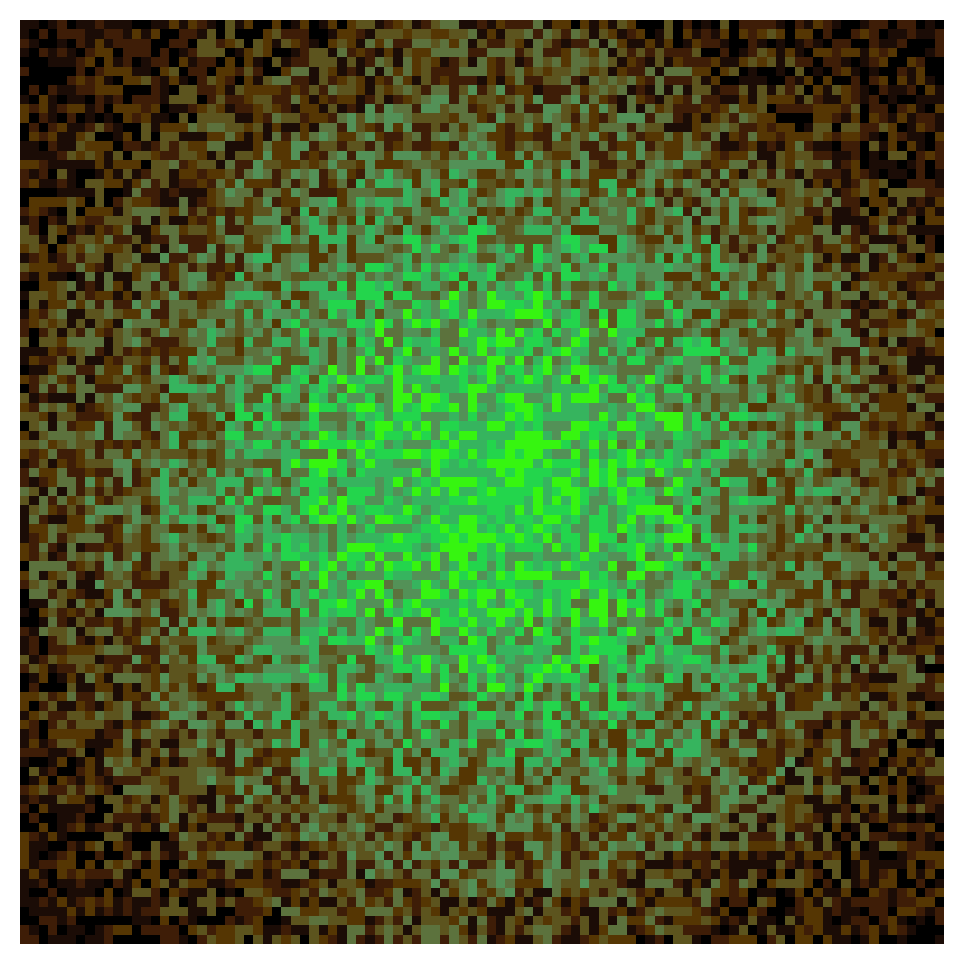

In [32]:
fig,ax = plt.subplots(figsize=(6,6))
ax.imshow(forest,cmap="cmr.tree")
ax.axis('off')

In [33]:
visible = np.zeros_like(forestpad,dtype=bool)
for k in range(1,forestpad.shape[0]-1):
    htreeE = forestpad[:,:k].max(axis=1)
    htreeW = forestpad[:,k+1:].max(axis=1)
    visible[:,k] = visible[:,k] | (forestpad[:,k]>np.minimum(htreeE,htreeW))
for k in range(1,forestpad.shape[1]-1):
    htreeN = forestpad[:k].max(axis=0)
    htreeS = forestpad[k+1:].max(axis=0)
    visible[k] = visible[k] | (forestpad[k]>np.minimum(htreeN,htreeS))

Visible trees : 1851


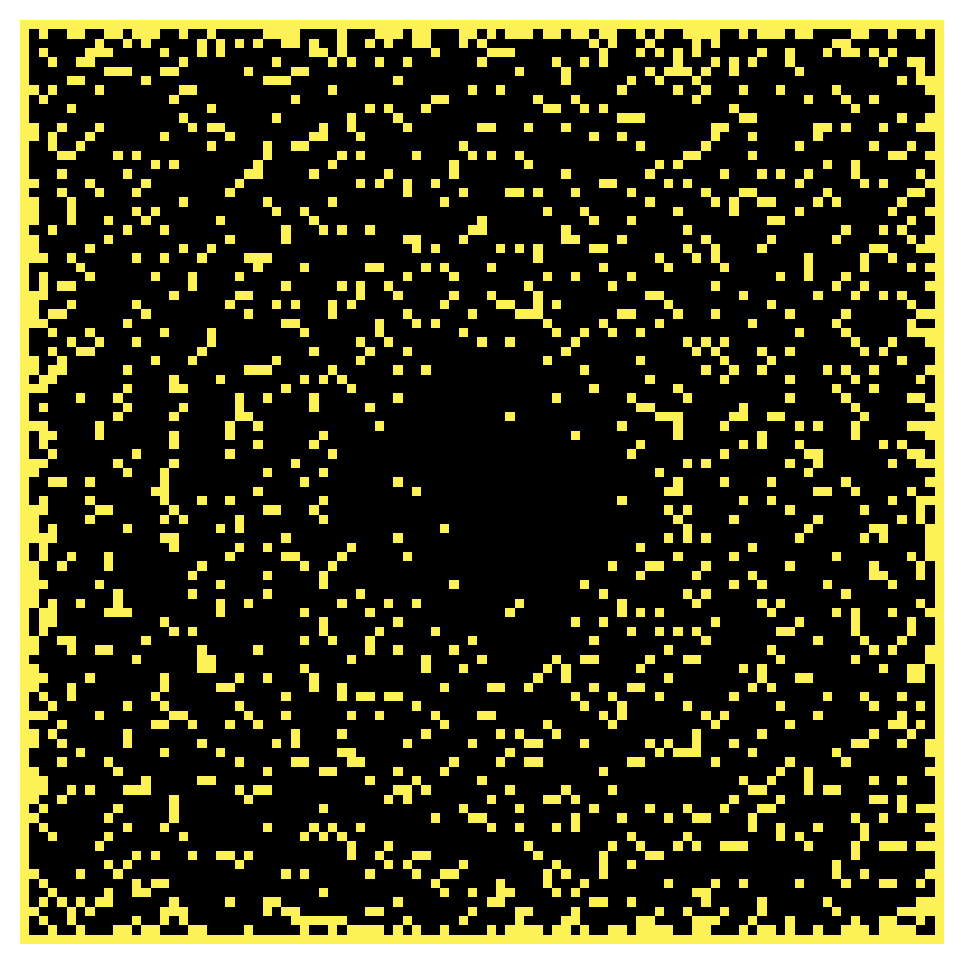

In [34]:
fig,ax = plt.subplots(figsize=(6,6))
ax.imshow(visible[1:-1,1:-1],cmap="cmr.eclipse",)
ax.axis('off')
print(f"Visible trees : {visible.sum()}")

In [35]:
scenicview = np.pad(np.ones_like(forest[1:-1,1:-1],dtype=int),1)
for k in range(1,forest.shape[1]-1):
    treeE =forest[:,k,np.newaxis] <= forest[:,k::-1]
    treeE[:,0]=False
    distanceE = np.argmax(treeE,axis=1)
    distanceE[distanceE==0] = k
    treeW =forest[:,k,np.newaxis] <= forest[:,k:]
    treeW[:,0]=False
    distanceW = np.argmax(treeW,axis=1)
    distanceW[distanceW==0] = forest.shape[1]-1-k
    scenicview[:,k]*=distanceW*distanceE

for k in range(1,forest.shape[0]-1):
    treeN =forest[k,np.newaxis] <= forest[k::-1]
    treeN[0]=False
    distanceN = np.argmax(treeN,axis=0)
    distanceN[distanceN==0] = k
    treeS =forest[k,np.newaxis] <= forest[k:]
    treeS[0]=False
    distanceS = np.argmax(treeS,axis=0)
    distanceS[distanceS==0] = forest.shape[0]-1-k
    scenicview[k]*=distanceS*distanceN

print(f"Highest scenic view : {np.max(scenicview)}")

Highest scenic view : 574080


(-0.5, 98.5, 98.5, -0.5)

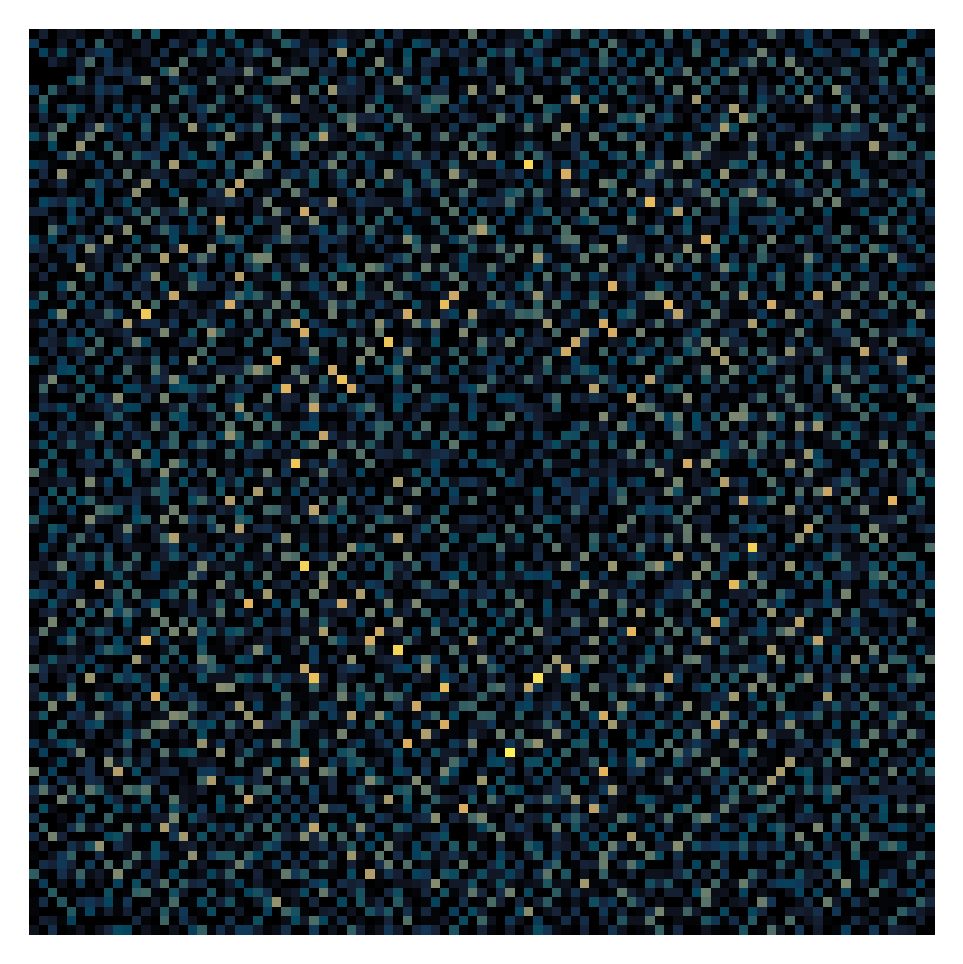

In [36]:
import matplotlib.colors as colors
fig,ax = plt.subplots(figsize=(6,6))
plt.imshow(scenicview,norm=colors.LogNorm(vmin=1, vmax=scenicview.max()),cmap="cmr.eclipse")
plt.axis("off")
# plt.colorbar()
# plt.title("Scenic view")